In [6]:
import cv2
import math
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle


from time import time
from mpl_toolkits.mplot3d import Axes3D

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout


from gtts import gTTS
from playsound import playsound

#####################################################################################
# Initiate mediapipe 


mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [8]:
df = pd.read_csv('coords.csv') #dataset

In [8]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69) #spliting data into training and testing

In [9]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [10]:
pipelines = {
    'lr':make_pipeline(RobustScaler(), LogisticRegression()),
    'rc':make_pipeline(RobustScaler(), RidgeClassifier()),
    'svc':make_pipeline(RobustScaler(), SVC()),
    'xgb':make_pipeline(RobustScaler(), XGBClassifier()),
    'rf':make_pipeline(RobustScaler(), RandomForestClassifier()),
    'gb':make_pipeline(RobustScaler(), GradientBoostingClassifier())
}

In [11]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

C:\Users\Isfan\anaconda3\envs\Capstone-NLP\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Isfan\anaconda3\envs\Capstone-NLP\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecati

[03:59:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [12]:
fit_models

{'lr': Pipeline(memory=None,
          steps=[('robustscaler',
                  RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                               with_centering=True, with_scaling=True)),
                 ('logisticregression',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False),
 'rc': Pipeline(memory=None,
          steps=[('robustscaler',
                  RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                               with_centering=True, with_scaling=True)),
                 ('ridgecla

In [13]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9944444444444445
rc 1.0
svc 0.9388888888888889
xgb 0.9944444444444445
rf 1.0
gb 0.9944444444444445


C:\Users\Isfan\anaconda3\envs\Capstone-NLP\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [14]:
#making a function that did everything above
def fit_predict(model,X_test, y_test):
    y_pred=model.predict(X_test)
    print("Model name: " + type(model.steps[1][1]).__name__ )
    print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
    print("classification report\n")
    print(classification_report(y_test,y_pred))
    print("\n")
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=fit_models['gb'].classes_).plot(cmap='viridis')
    #plt.title(f'Confusion matrix of {model} model on test data')
    plt.show()

Model name: LogisticRegression
Accuracy score: 0.9944444444444445
classification report

              precision    recall  f1-score   support

       happy       1.00      1.00      1.00        56
     neutral       0.98      1.00      0.99        58
         sad       1.00      0.98      0.99        66

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180





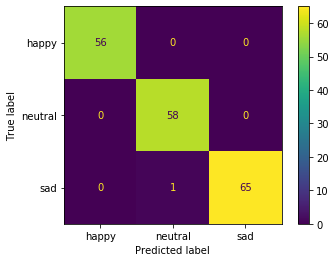

In [15]:
fit_predict(fit_models['lr'], X_test, y_test)

In [16]:
with open('OpenCV_LR.pkl', 'wb') as f:
    pickle.dump(fit_models['lr'], f)

In [10]:
with open('OpenCV_LR.pkl', 'rb') as f:
    model = pickle.load(f)

In [11]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [12]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
                             

In [13]:
vid_path = 'demo_happy_neural_sad_2.mp4'

In [15]:
temp = ''
timer = 10
cap = cv2.VideoCapture(vid_path)  #Might need to change from 1 to a different number... default system camera is usually 0.
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        
        # Extract landmarks
        try:
            landmarks = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
            
            # Make Detections
            X = pd.DataFrame([landmarks])
            classification = model.predict(X)[0]
            probability = model.predict_proba(X)[0]
            print(classification, np.round(probability,2))
            
            #if (np.amax(np.round(probability,2)) > .1):
                # Get status box
            cv2.rectangle(image, (0,0), (590, 60), (100, 100, 10), -1)
            cv2.putText(image, 'CLASS', (130,15), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, 'PROB', (15,15), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(probability[np.argmax(probability)],2)), (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            if (np.amax(np.round(probability,2)) > .90):
                # Displaying classification
                cv2.putText(image, classification, (120,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        except:
            pass
        

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)


        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

            
    cap.release()
    cv2.destroyAllWindows()

happy [0.98 0.   0.02]
happy [0.96 0.   0.04]
happy [0.95 0.   0.05]
happy [0.94 0.   0.06]
happy [0.92 0.   0.08]
happy [0.95 0.   0.05]
happy [0.97 0.   0.03]
happy [0.98 0.   0.02]
happy [0.99 0.   0.01]
happy [0.98 0.   0.02]
happy [0.99 0.   0.01]
happy [0.99 0.   0.01]
happy [0.99 0.   0.01]
happy [0.99 0.   0.01]
happy [1. 0. 0.]
happy [0.99 0.   0.01]
happy [0.99 0.   0.01]
happy [1. 0. 0.]
happy [1. 0. 0.]
happy [1. 0. 0.]
happy [1. 0. 0.]
happy [1. 0. 0.]
happy [1. 0. 0.]
happy [1. 0. 0.]
happy [1. 0. 0.]
happy [0.99 0.   0.01]
happy [1. 0. 0.]
happy [0.99 0.   0.01]
happy [0.99 0.   0.01]
happy [0.99 0.   0.01]
happy [1. 0. 0.]
happy [1. 0. 0.]
happy [0.99 0.   0.01]
happy [0.99 0.   0.01]
happy [1. 0. 0.]
happy [0.99 0.   0.01]
happy [1. 0. 0.]
happy [0.99 0.   0.01]
happy [0.99 0.   0.01]
happy [0.99 0.   0.01]
happy [0.96 0.   0.04]
happy [0.97 0.   0.03]
happy [0.96 0.   0.04]
happy [0.98 0.   0.02]
happy [0.98 0.   0.02]
happy [0.98 0.   0.02]
happy [0.99 0.   0.01]
hap

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_xlv4eex\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [28]:
landmarks

array([ 0.5008499 ,  0.61974049, -0.0168263 , ...,  0.56491989,
        0.47733364, -0.00720226])